In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math



In [21]:
sample_size = 10000
x = np.random.normal(0, 1, sample_size)
y = np.random.normal(0, 1, sample_size)
points = np.array([x, y]).T



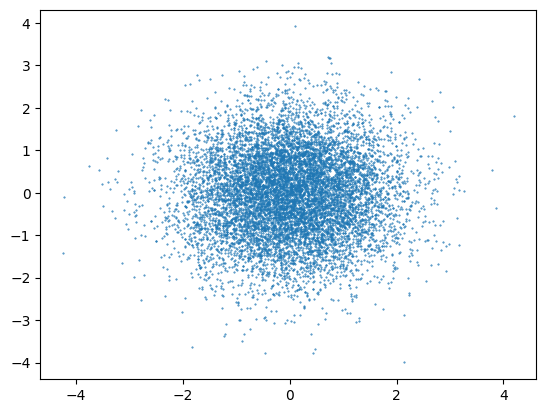

In [22]:
plt.scatter(x,y, s = 0.2)
plt.show()

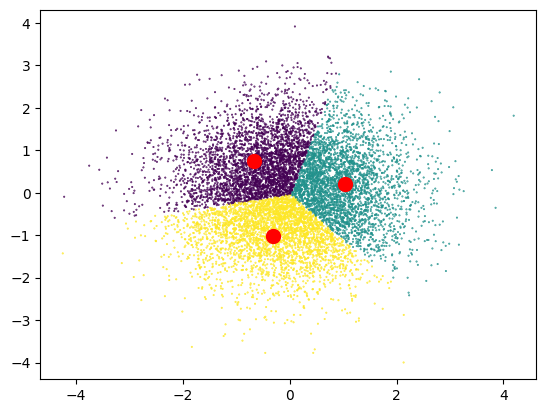

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(points)
centers = kmeans.cluster_centers_
plt.scatter(x, y, c=kmeans.labels_, s=0.2)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

In [24]:
norm1 = math.sqrt(centers[0][0]**2 + centers[0][1]**2)
norm2 = math.sqrt(centers[1][0]**2 + centers[1][1]**2)
norm3 = math.sqrt(centers[2][0]**2 + centers[2][1]**2)
R1 = (norm1 + norm2 + norm3) / 3
print(R1)

1.0382228536811997


In [25]:
r_it = 10000
R_list = []

for i in range(r_it):
    # x = np.random.normal(0, 1, sample_size)
    # y = np.random.normal(0, 1, sample_size)
    # points = np.array([x, y]).T
    kmeans = KMeans(n_clusters=3, random_state=42).fit(points)
    centers = kmeans.cluster_centers_
    norm = np.linalg.norm(centers, axis = 1)
    R = np.mean(norm)
    R_list.append(R)
    
    
print(R_list)



[np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811997), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811997), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811997), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.float64(1.0382228536811995), np.floa

0.0
number of iterations needed for 9 digit accuracy:  0


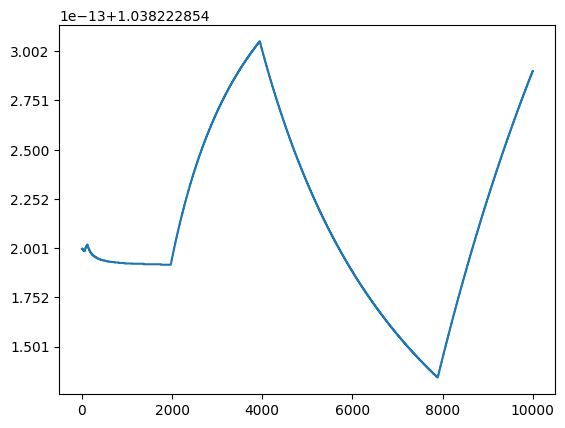

In [26]:
Cumulative = list(map(lambda x, y: x/y, np.cumsum(R_list), range(1, r_it+1)))
acc = 1e-9
for i in range(r_it - 1):
    print(Cumulative[i + 1] - Cumulative[i])
    if abs(Cumulative[i+1] - Cumulative[i]) < acc:
        print("number of iterations needed for 9 digit accuracy: ", i)
        break
plt.plot([i + 1 for i in range(r_it)], Cumulative)
plt.show()